In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import Data_sets

In [3]:
perth_df = pd.read_csv("Data_sets\Perth_Data.csv")
perth_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] +['Power_all']

perth_new_df = pd.DataFrame()

for i in range(1, 17):
    perth_new_df[f'P{i}'] = perth_df[f'P{i}']
perth_new_df['Power_all'] = perth_df['Power_all']

perth_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\48663\AppData\Local\Temp\ipykernel_15248\2250991941.py:1: SyntaxWarning: invalid escape sequence '\P'
  perth_df = pd.read_csv("Data_sets\Perth_Data.csv")


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
0,427.4820,147.4593,474.9960,9.5407,258.2593,404.2589,524.3422,44.4009,70.4385,468.8828,...,98879.6861,82893.9171,89158.6518,80356.5067,100927.1007,89760.5631,97828.2206,99214.7876,79108.3094,1479133.940
1,423.7709,155.9451,470.8182,4.0438,253.8868,390.2231,509.0224,50.7996,72.8076,463.4203,...,100504.0370,81572.7820,89932.3496,80588.3130,100977.1693,90274.1347,97757.2251,99333.6857,79691.2458,1475814.243
2,431.8288,146.6720,466.1145,7.0164,261.3787,408.9941,521.9852,44.0360,77.5854,450.5736,...,99857.6062,82267.0302,88657.7954,79139.2437,100480.0554,91102.1702,98224.0435,100672.3076,78387.9296,1484052.684
3,437.7897,141.3579,474.3819,4.3434,256.5644,393.0113,516.1617,52.4880,66.1179,457.0365,...,99953.9882,80579.2854,88819.3409,80145.6969,100693.3759,89663.6079,97947.9575,100924.1871,80104.7240,1479350.362
4,450.8980,144.7559,475.3267,2.5512,241.1346,400.2228,510.2312,54.6467,78.7078,466.5793,...,101316.4648,77925.4484,87779.9566,81388.1816,100582.6873,91470.9832,97741.0470,100097.4638,79993.7164,1480235.758


In [4]:
perth_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,307.699347,263.070612,310.030123,280.013796,271.573227,271.823645,271.624806,265.369786,300.027841,265.177959,...,87172.608685,87227.504851,87479.666124,87259.717304,86416.344782,86879.880051,86110.006386,88026.099911,87450.222314,1.394474e+06
std,186.407136,182.581205,188.617119,180.756415,183.358872,181.908406,180.590296,182.812626,179.270315,183.327602,...,10574.714409,10196.668231,10087.897047,10470.723965,10574.225552,9942.141893,10371.876481,10471.574508,10477.575900,5.224964e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46239.804500,50114.929100,47183.047800,49291.778000,49549.990600,49465.685600,47027.625800,48982.438200,46881.573700,1.177711e+06
25%,132.551750,97.074000,126.133550,117.152850,98.514700,102.462550,105.551400,94.713600,134.877500,101.783700,...,79380.334100,79774.810650,79824.903400,79398.645350,78207.234750,80018.621350,78324.298250,80115.162800,79372.887300,1.359069e+06
50%,343.866000,243.848700,347.420000,282.059100,265.251300,267.371400,261.311300,251.314100,316.861100,253.391800,...,88612.820700,88460.903900,88767.991600,88451.697000,87220.716100,87720.523300,86479.413300,90513.480700,89574.098300,1.388877e+06
75%,477.287200,427.381950,480.394400,440.355200,441.643150,435.246350,436.595450,441.454600,461.048700,435.321450,...,96919.687700,96704.534750,96880.955100,96922.406900,96700.561650,96550.212600,96575.218750,97074.449000,96752.117600,1.426946e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,107228.154900,105509.436700,104693.116900,104978.220800,103852.565800,104757.583200,104435.890300,105785.806400,104430.644700,1.565836e+06


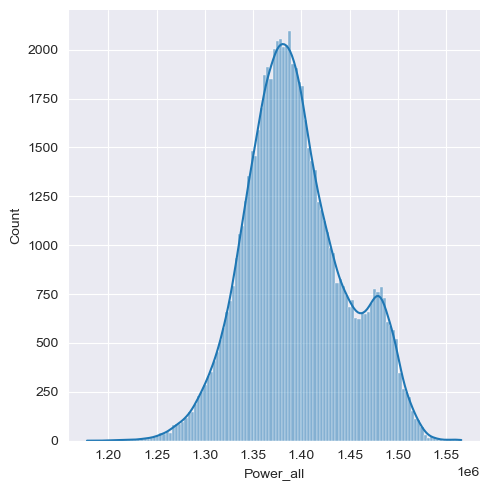

In [5]:
sns.displot(perth_df['Power_all'], kde=True)

In [6]:
# Usunięcie wszystkich kolumn Pi (P1 do P16)
columns_to_remove = [f"P{i}" for i in range(1, 17)]
perth_new_df = perth_df.drop(columns=columns_to_remove, errors='ignore')

perth_df = perth_new_df
print("Kolumny po usunięciu P1-P16:", perth_df.columns)

perth_df.head(10)


Kolumny po usunięciu P1-P16: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
       'Power_all'],
      dtype='object')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Power_all
0,427.4820,147.4593,474.9960,9.5407,258.2593,404.2589,524.3422,44.4009,70.4385,468.8828,...,519.1315,364.8982,65.3082,101.1422,490.5889,345.8587,239.1995,12.1615,68.4592,1479133.940
1,423.7709,155.9451,470.8182,4.0438,253.8868,390.2231,509.0224,50.7996,72.8076,463.4203,...,525.0178,371.9532,81.5468,95.3886,475.8627,350.7924,240.0667,7.0359,86.0173,1475814.243
2,431.8288,146.6720,466.1145,7.0164,261.3787,408.9941,521.9852,44.0360,77.5854,450.5736,...,513.8518,371.2593,77.4516,92.7453,478.5863,348.8754,227.3840,1.0817,78.1879,1484052.684
3,437.7897,141.3579,474.3819,4.3434,256.5644,393.0113,516.1617,52.4880,66.1179,457.0365,...,503.1606,372.2845,82.0181,87.2123,482.1999,346.8257,226.7739,0.0000,83.0666,1479350.362
4,450.8980,144.7559,475.3267,2.5512,241.1346,400.2228,510.2312,54.6467,78.7078,466.5793,...,517.8953,373.6055,68.8797,101.4923,482.3627,334.8205,218.6794,0.0000,79.9809,1480235.758
5,438.4449,145.8895,480.3081,0.0000,257.6128,406.4007,518.2356,45.6470,72.2370,463.7746,...,518.4353,374.2728,75.7245,80.4783,490.5080,356.4677,224.0400,12.6368,69.6172,1484054.528
6,424.0230,149.5980,475.5490,6.5324,248.6003,411.4488,510.8031,51.3025,77.3265,465.1731,...,516.6668,374.9350,89.3824,92.6343,474.7915,344.4997,224.9296,5.3101,78.4871,1484466.604
7,439.7945,150.9443,462.8802,0.0000,256.5223,402.1251,524.6089,52.3963,77.1711,464.1097,...,511.8751,374.3035,79.0846,89.0713,485.4351,345.9197,213.3402,4.6677,77.3412,1487005.295
8,445.5542,146.2119,465.4023,5.4237,260.9830,408.2051,509.7389,48.9131,74.1388,463.7998,...,517.1809,381.6960,79.2613,91.1370,485.9313,349.1302,230.0207,5.4065,77.8418,1480348.616
9,447.3091,149.1706,472.1891,0.0000,247.5049,403.0306,512.4737,49.1549,76.1663,463.9086,...,526.2818,374.9558,79.1964,94.6199,484.2089,349.4180,223.2019,0.0000,67.6781,1483565.850


In [7]:
has_nan = perth_df.isnull().values.any()
print(" NaN:", has_nan)

 NaN: False


In [8]:
perth_df = perth_df.dropna()
perth_df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
71994    False
71995    False
71996    False
71997    False
71998    False
Length: 71999, dtype: bool

In [9]:
nan_counts = perth_df.isnull().sum()
print(nan_counts)

X1           0
X2           0
X3           0
X4           0
X5           0
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
X13          0
X14          0
X15          0
X16          0
Y1           0
Y2           0
Y3           0
Y4           0
Y5           0
Y6           0
Y7           0
Y8           0
Y9           0
Y10          0
Y11          0
Y12          0
Y13          0
Y14          0
Y15          0
Y16          0
Power_all    0
dtype: int64


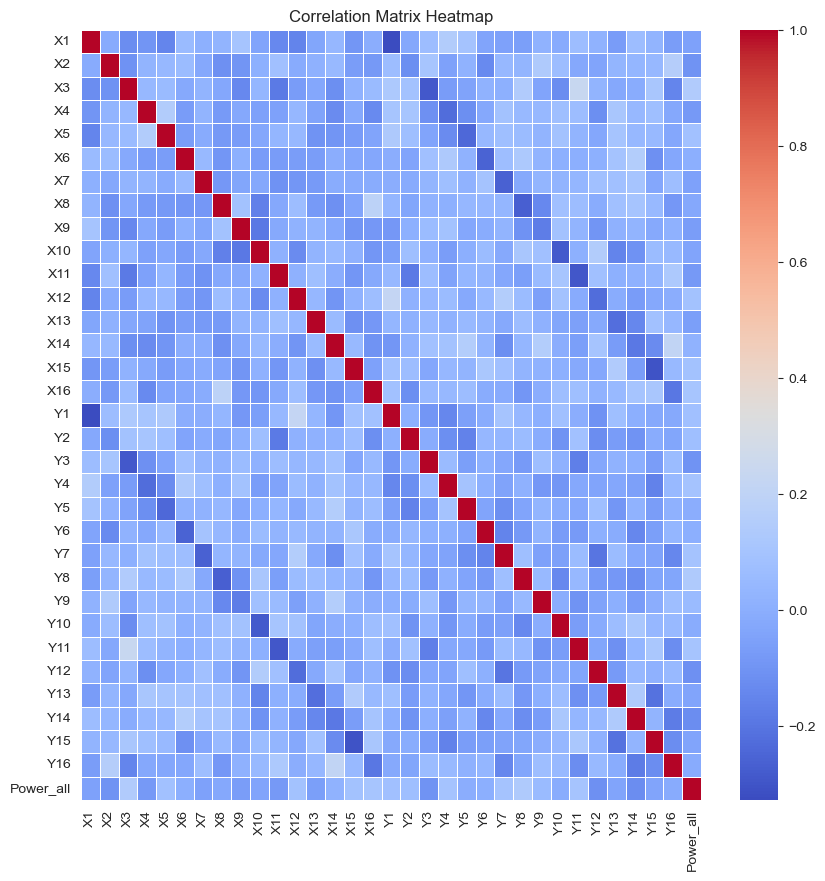

In [10]:
correlation_matrix = perth_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

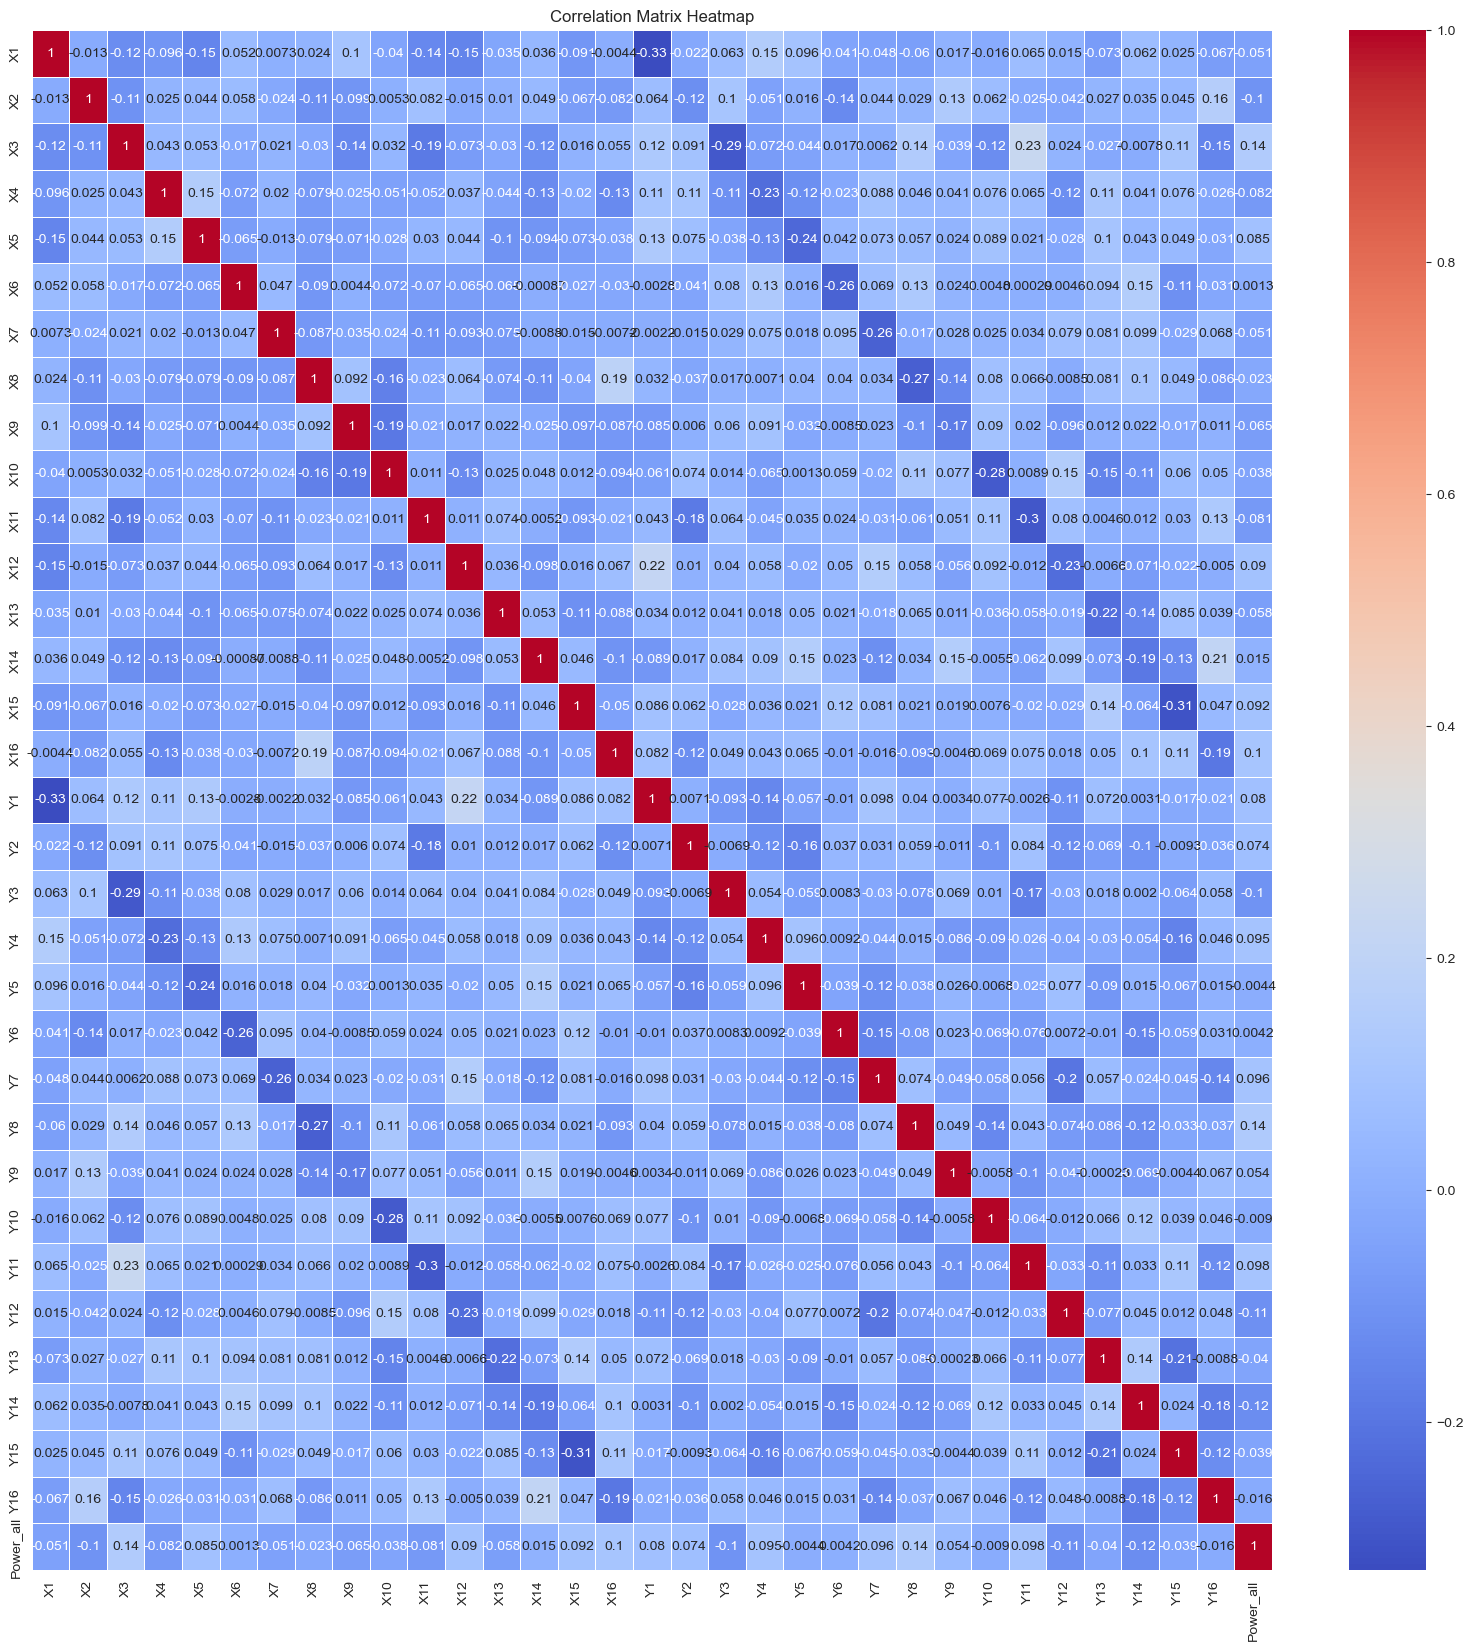

In [11]:
correlation_matrix = perth_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix,annot = True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

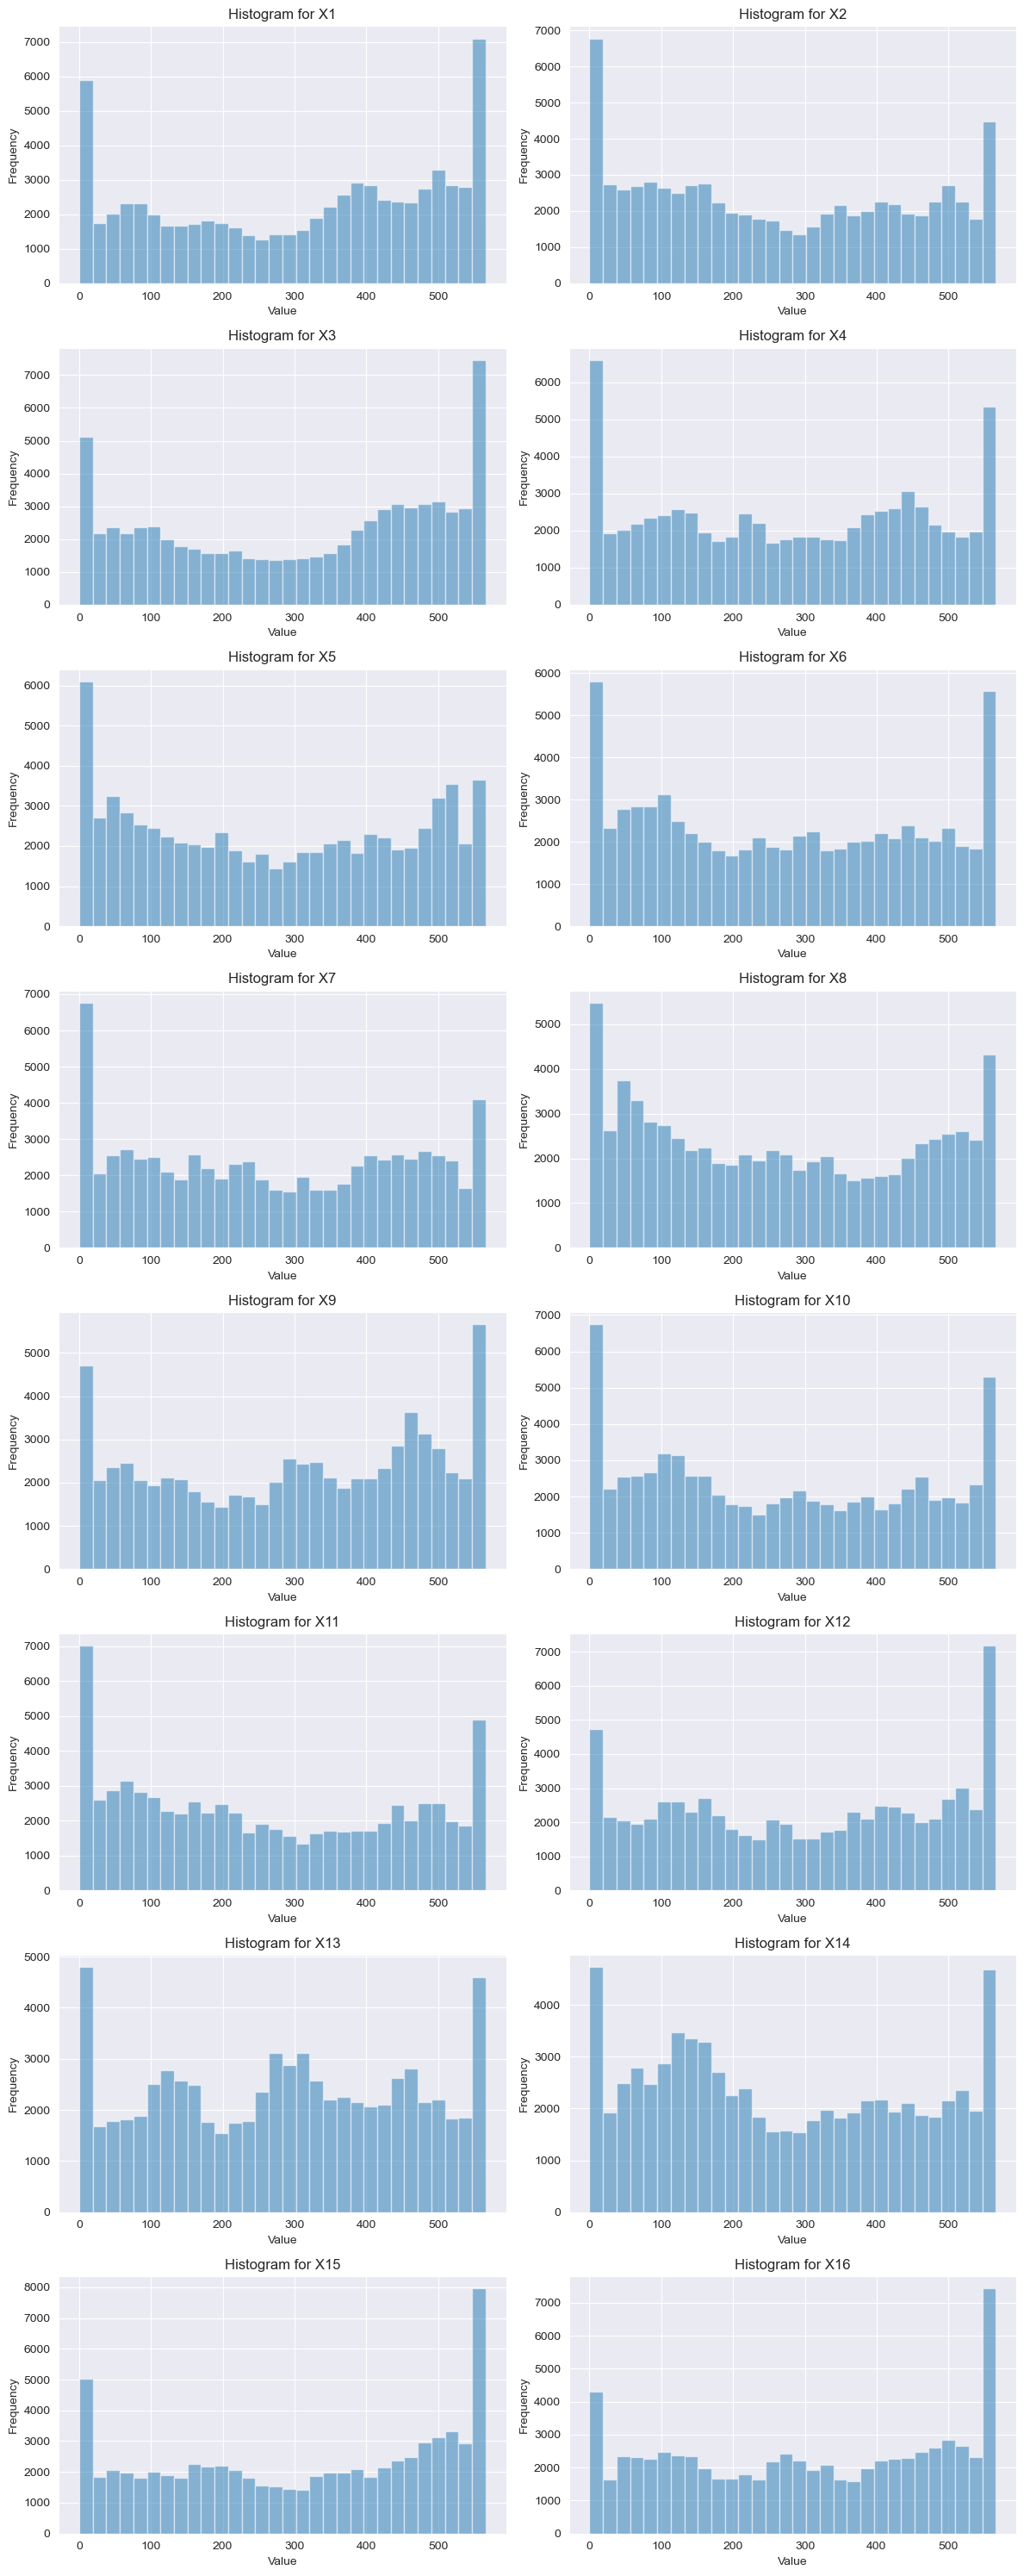

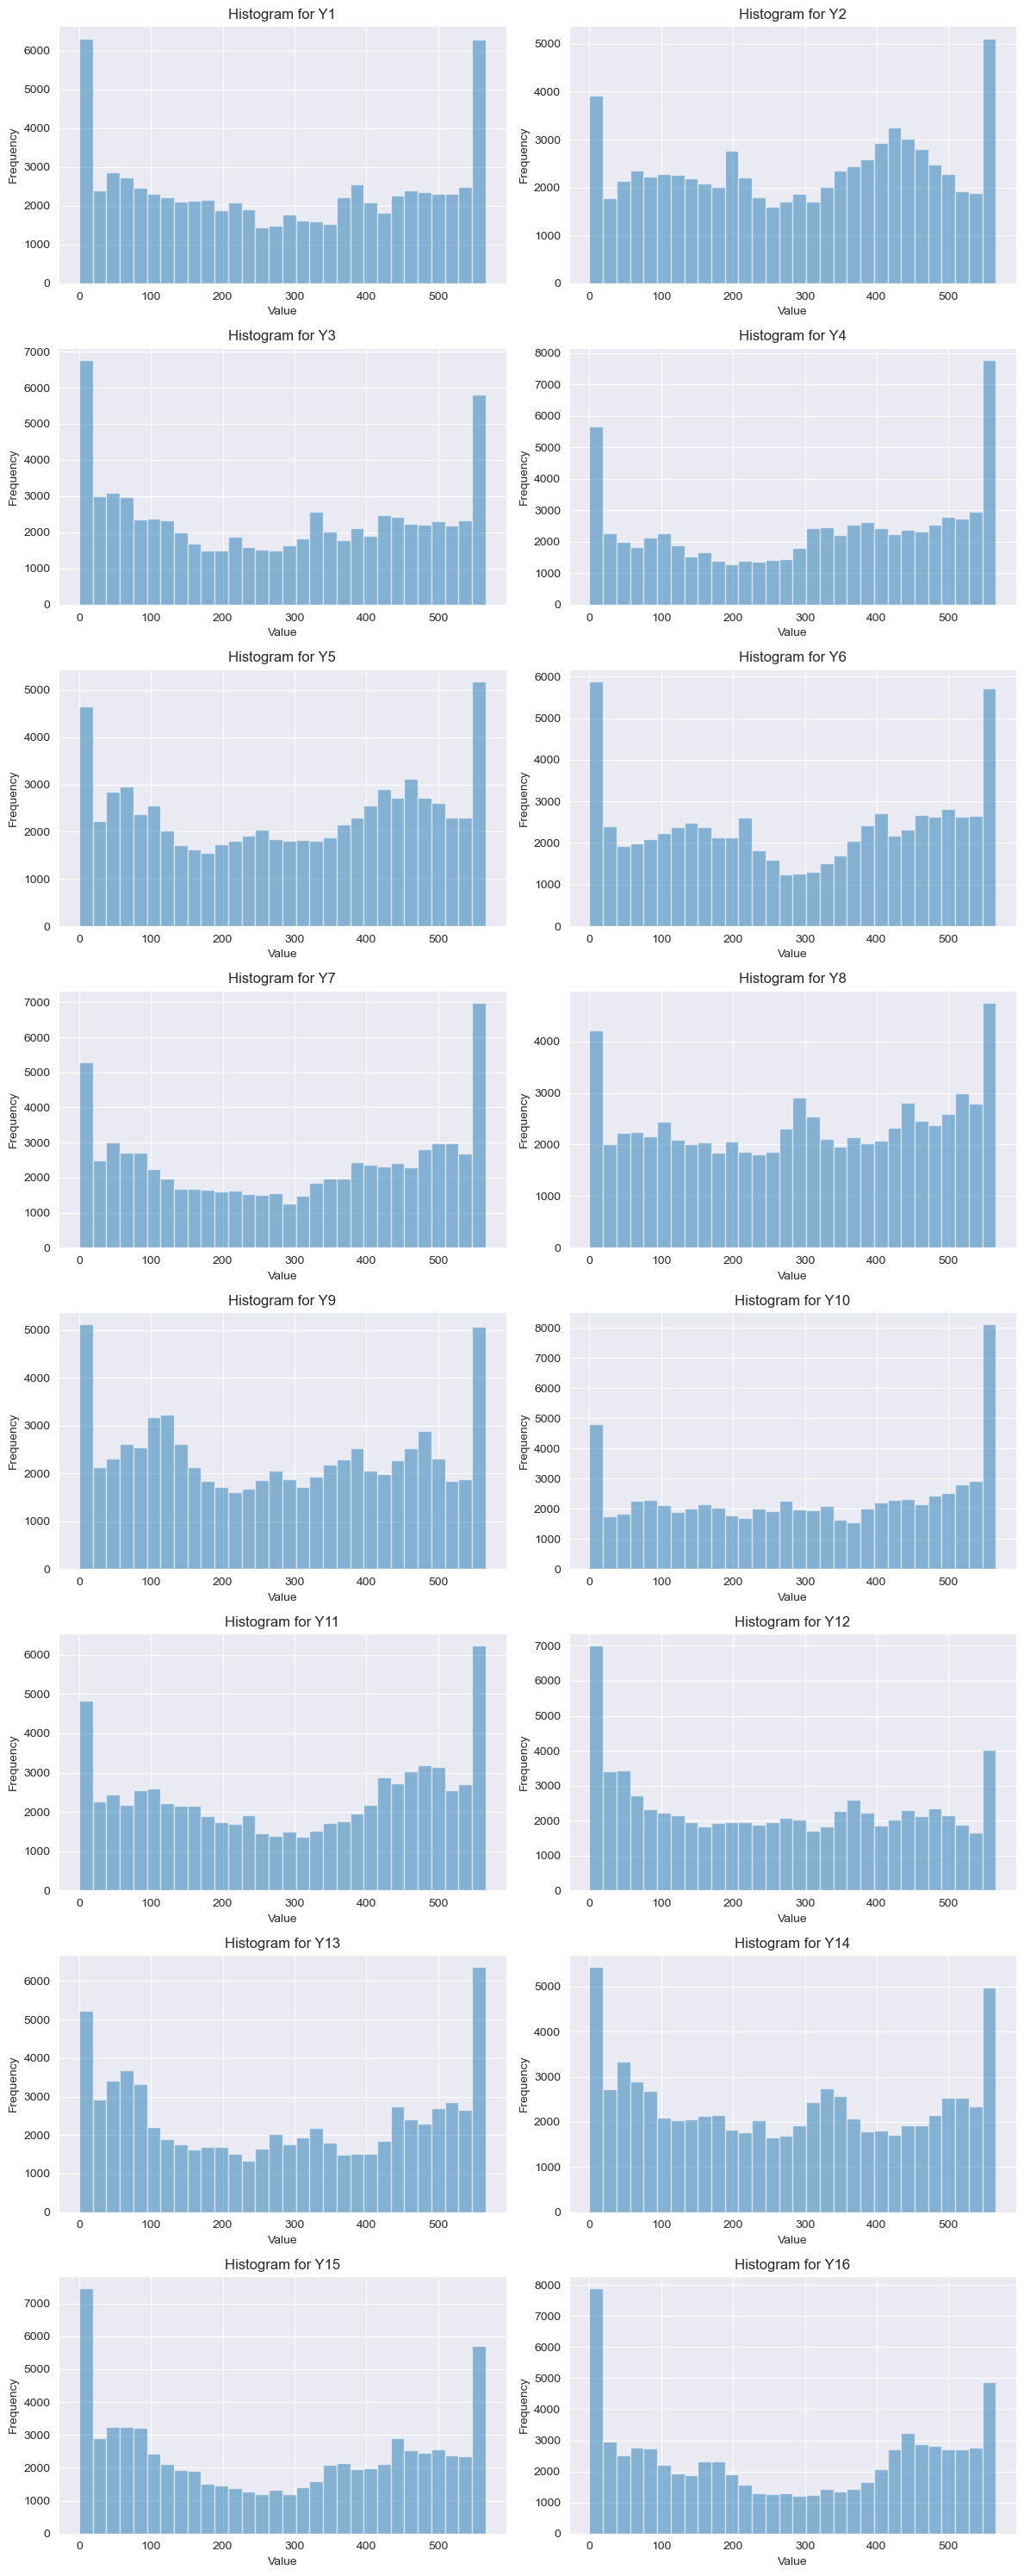

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
fig, axes = plt.subplots(8, 2, figsize=(12, 30))
for i, ax in enumerate(axes.flatten()):
    perth_df[f"X{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for X{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(8, 2, figsize=(12, 30))
for i, ax in enumerate(axes.flatten()):
    perth_df[f"Y{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for Y{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


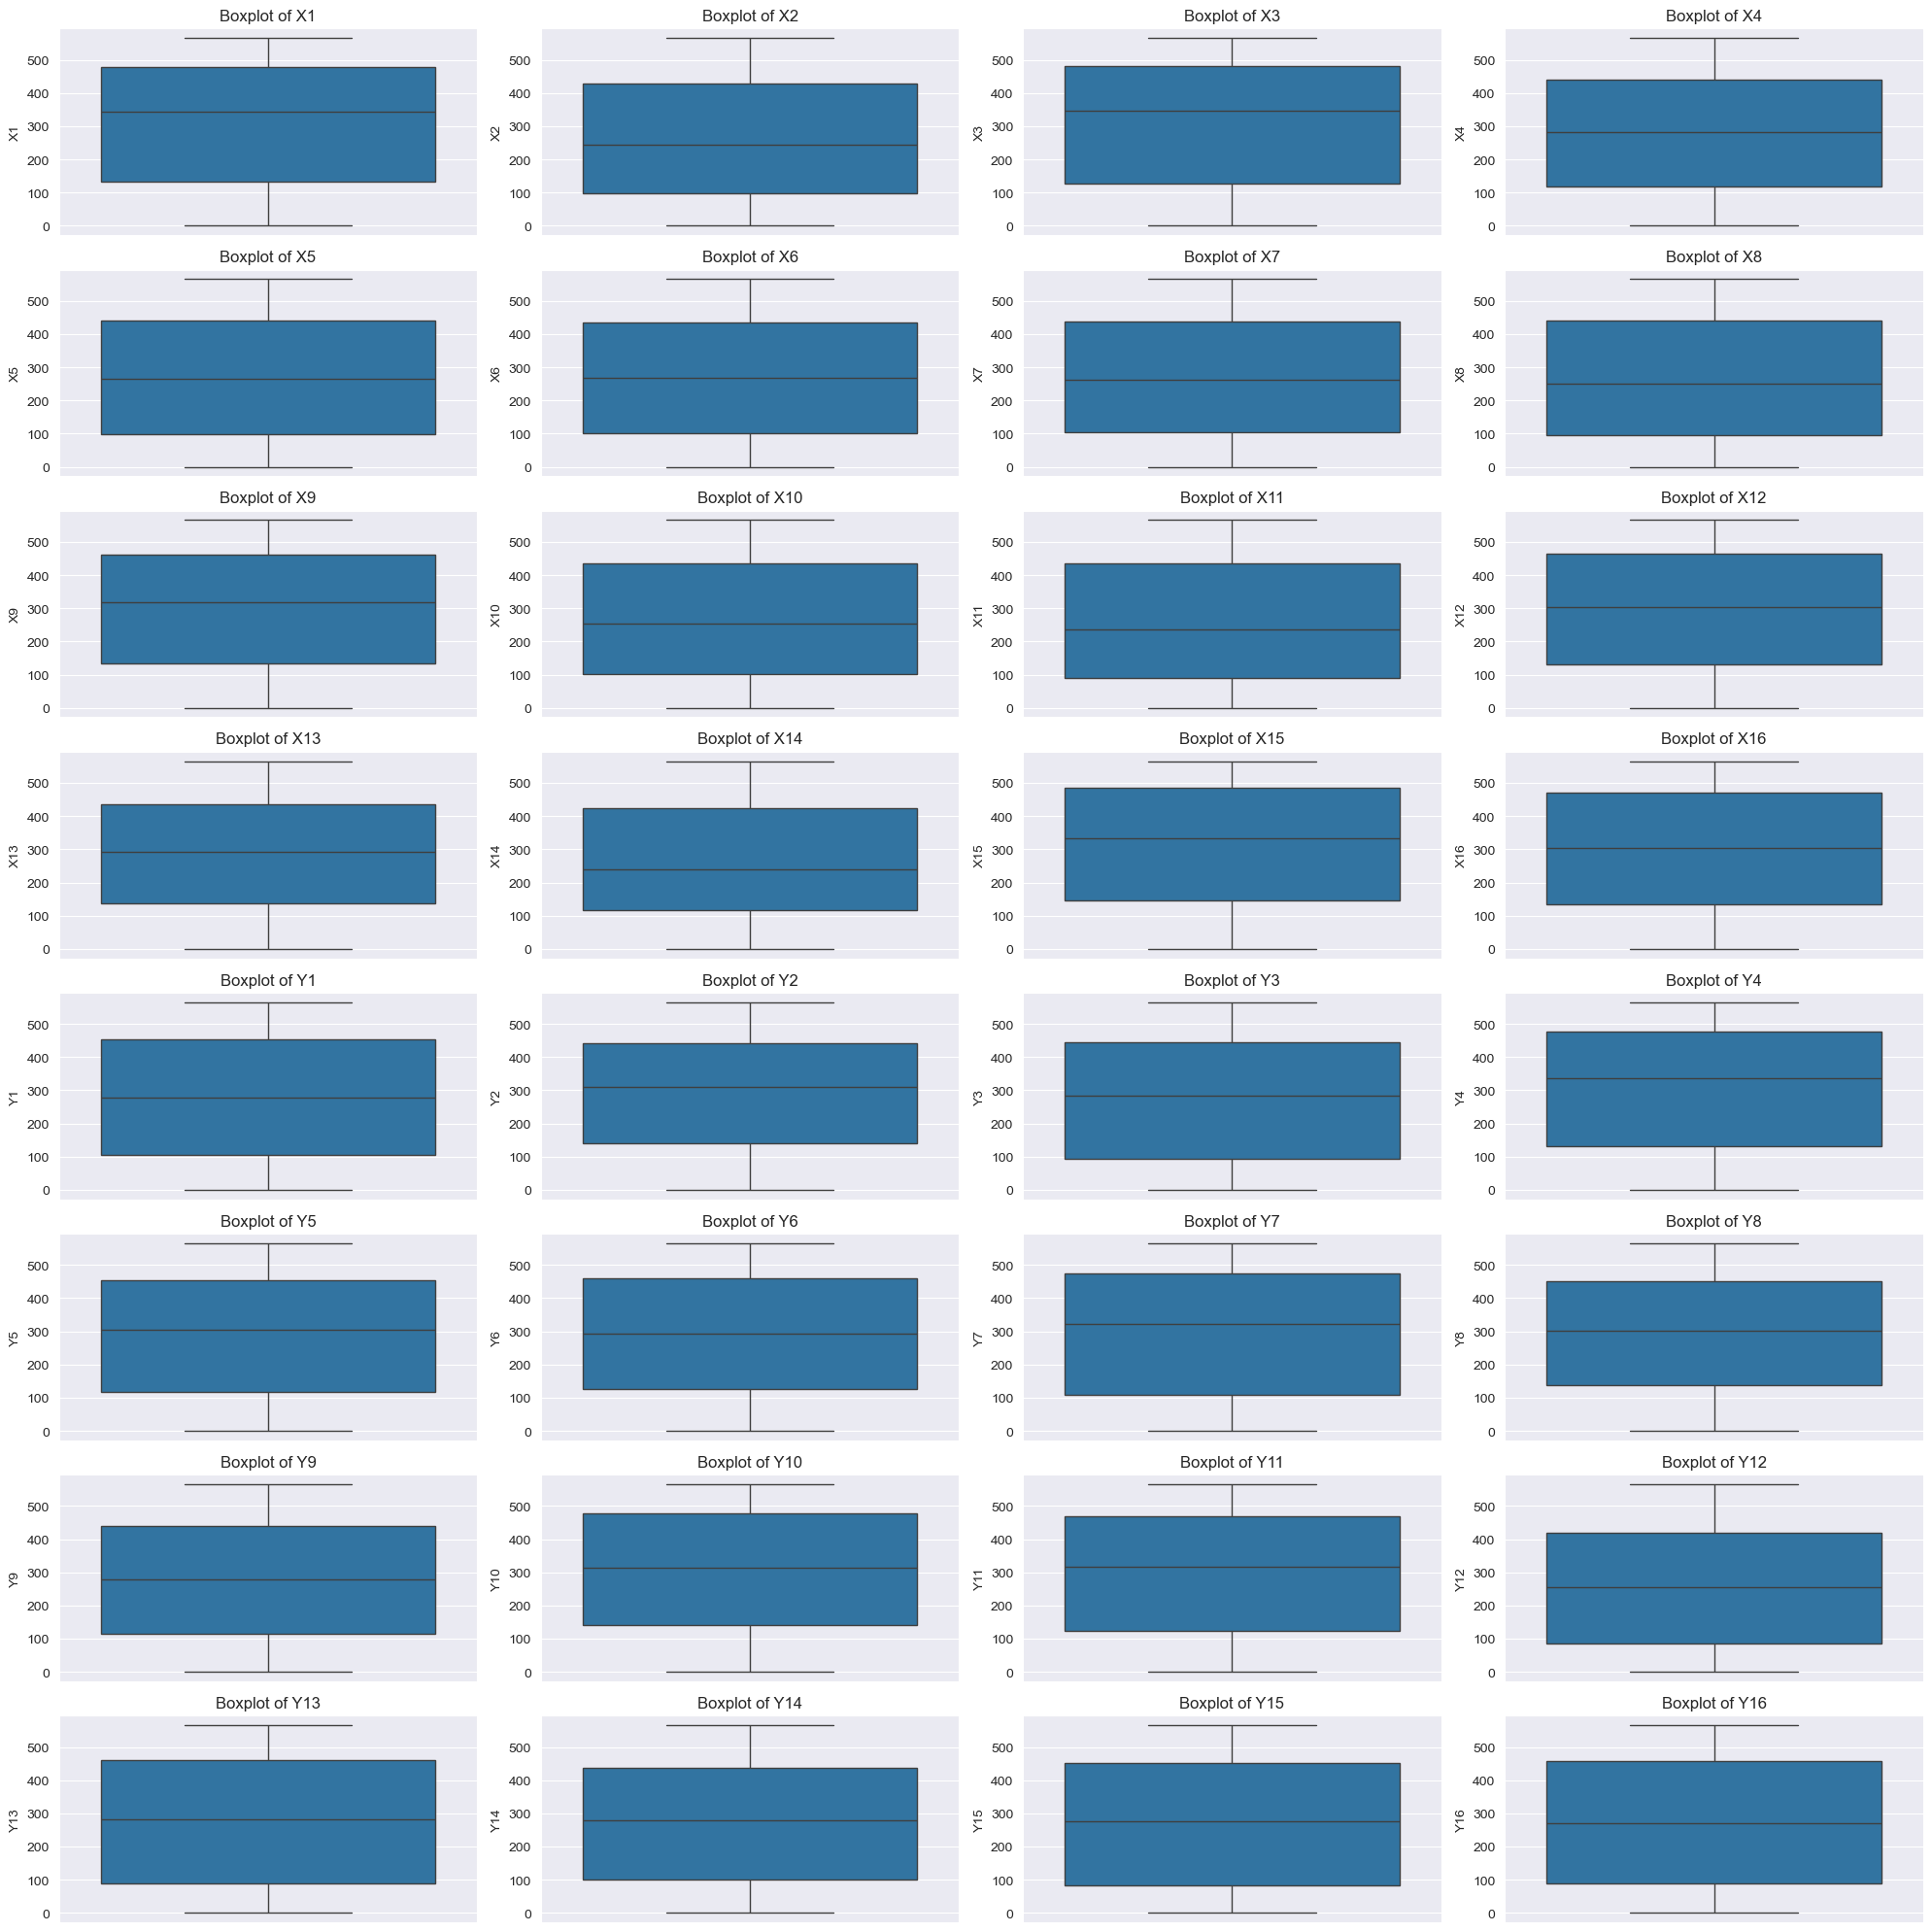

In [13]:
columns_to_plot = [f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(y=perth_df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


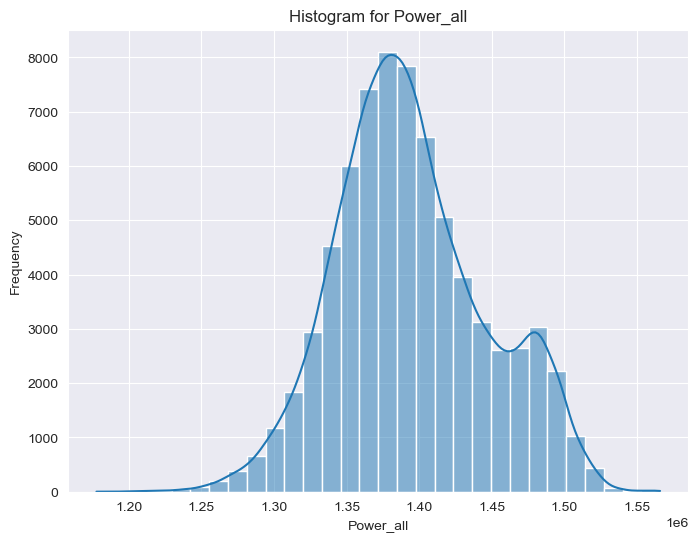

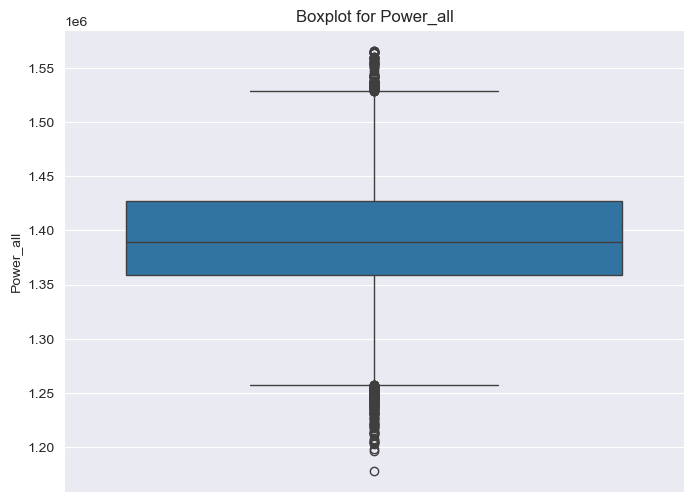

In [14]:
# Histogram dla kolumny Power_all
# sydney_df['Power_all'] = np.log(sydney_df['Power_all'] - sydney_df['Power_all'].min() + 1)

plt.figure(figsize=(8, 6))
sns.histplot(perth_df['Power_all'], kde=True, bins=30)
plt.title('Histogram for Power_all')
plt.xlabel('Power_all')
plt.ylabel('Frequency')
plt.show()

# Boxplot dla kolumny Power_all
plt.figure(figsize=(8, 6))
sns.boxplot(y=perth_df['Power_all'])
plt.title('Boxplot for Power_all')
plt.ylabel('Power_all')
plt.show()

In [15]:
upper_limit = perth_df['Power_all'].mean() + 3 * perth_df['Power_all'].std()
lower_limit = perth_df['Power_all'].mean() - 3 * perth_df['Power_all'].std()


print(upper_limit)
print(lower_limit)

final_df_new = perth_df.loc[(perth_df['Power_all'] < upper_limit) & (perth_df['Power_all'] > lower_limit)]


print("Liczba wierszy po filtracji:", len(final_df_new))
print("Oryginalna liczba wierszy:", len(perth_df))

perth_df = final_df_new


1551222.605475811
1237724.7497664012
Liczba wierszy po filtracji: 71912
Oryginalna liczba wierszy: 71999


(array([ 2.,  2.,  2.,  4.,  2.,  4.,  2.,  4.,  4.,  2., 10.,  6.,  6.,
        16., 16., 34., 32., 40., 32., 56., 36., 50., 66., 62., 58., 84.,
        70., 66., 58., 54., 48., 42., 32.,  8., 16., 12., 10.,  0.,  2.,
         0.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 33.]),
 array([-0.32753371, -0.31425838, -0.30098304, -0.2877077 , -0.27443236,
        -0.26115703, -0.24788169, -0.23460635, -0.22133102, -0.20805568,
        -0.19478034, -0.181505  , -0.16822967, -0.15495433, -0.14167899,
        -0.12840366, -0.11512832, -0.10185298, -0.08857764, -0.07530231,
        -0.06202697, -0.04875163, -0.0354763 , -0.02220096, -0.00892562,
         0.00434972,  0.01762505,  0.03090039,  0.04417573,  0.057451

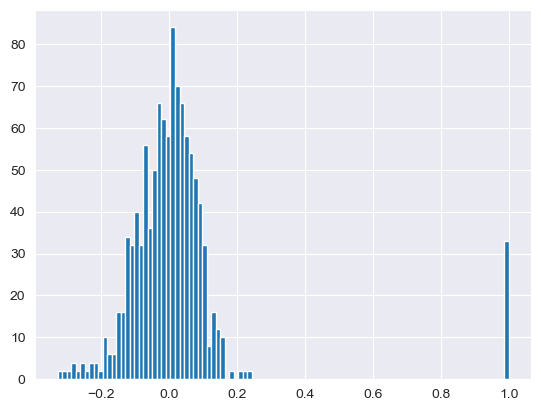

In [16]:
tab=np.array(correlation_matrix).reshape(-1)
plt.hist(tab, bins=100)

In [17]:
# Przygotowanie cech (X) i etykiety (y)
X = perth_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y = perth_df["Power_all"]

# Podział na zestawy train, validation i test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Informacja o rozmiarach zbiorów
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 50338 samples
Validation set: 10787 samples
Test set: 10787 samples


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

# Obliczanie MSE, RMSE
mse = mean_squared_error(y_val, y_val_pred_lr)
rmse_lr = np.sqrt(mse)

# Obliczanie współczynnika determinacji R²
r2_lr = lr.score(X_val, y_val)  # R² dla modelu

# Wyświetlanie wyników
print(f"Linear Regression - MSE: {mse}, RMSE: {rmse_lr}, R²: {r2_lr}")


Linear Regression - MSE: 2320806574.8596044, RMSE: 48174.750387102205, R²: 0.13577600382841748


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definicja hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200],  # Zmniejszono do dwóch wartości
    'max_depth': [3, 5],  # Zmniejszono do dwóch wartości
    'learning_rate': [0.1, 0.2]  # Zmniejszono do dwóch wartości
}

# Tworzenie modelu Gradient Boosting
model = GradientBoostingRegressor(random_state=42)

# Grid Search z walidacją krzyżową
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # używamy MSE jako funkcji kosztu
    cv=3,  # liczba podziałów do walidacji krzyżowej
    verbose=1,
    n_jobs=-1  # równoległe przetwarzanie
)

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepszy model i jego hiperparametry
best_model = grid_search.best_estimator_
print("Najlepsze hiperparametry:", grid_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_model.predict(X_val)

# Obliczanie MSE, RMSE i R²
mse = mean_squared_error(y_val, y_val_pred)
rmse_gb = np.sqrt(mse)
r2_gb = r2_score(y_val, y_val_pred)

# Wyświetlanie wyników
print(f"Gradient Boosting - MSE: {mse}, RMSE: {rmse_gb}, R²: {r2_gb}")

# Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
# Gradient Boosting - MSE: 390843132.5258998, RMSE: 19769.752970785947, R²: 0.854457490112813


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting - MSE: 390843132.5258998, RMSE: 19769.752970785947, R²: 0.854457490112813


In [20]:
# Ograniczenie danych do 20 tysięcy próbek
subset_df = perth_df.sample(n=15000, random_state=42)

# Przygotowanie cech (X) i celu (y) dla podzbioru danych
X_subset = subset_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y_subset = subset_df["Power_all"]

# Podział na zbiory train, validation i test
X_train_sub, X_temp_sub, y_train_sub, y_temp_sub = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)
X_val_sub, X_test_sub, y_val_sub, y_test_sub = train_test_split(X_temp_sub, y_temp_sub, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Definicja przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [200, 300],
    'max_depth': [20, 30],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [0.5, 1],
    'bootstrap': [True]
}

# Tworzenie modelu Random Forest
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV dla podzbioru danych
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=16,  # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Dopasowanie modelu do podzbioru danych treningowych
random_search.fit(X_train_sub, y_train_sub)

# Najlepszy model i jego hiperparametry
best_rf = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred_rf = best_rf.predict(X_val_sub)
mse_rf = mean_squared_error(y_val_sub, y_val_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val_sub, y_val_pred_rf)

print(f"Random Forest (Tuned on Subset) - MSE: {mse_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")

# Najlepsze hiperparametry: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
# Random Forest (Tuned on Subset) - MSE: 652644455.7232896, RMSE: 25546.906969793614, R^2: 0.7642903501729317


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\48663\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\48663\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\48663\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\48663\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\48663\anaconda3\Lib\site-packages\

Najlepsze hiperparametry: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Random Forest (Tuned on Subset) - MSE: 652644455.7232896, RMSE: 25546.906969793614, R^2: 0.7642903501729317


In [21]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error
# import numpy as np
# 
# # Definicja zoptymalizowanej przestrzeni hiperparametrów
# param_dist = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True, False]
# }
# 
# # Tworzenie modelu Random Forest
# rf = RandomForestRegressor(random_state=42)
# 
# # RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=10,  # Liczba losowych kombinacji do przetestowania
#     scoring='neg_mean_squared_error',
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1  # Użycie wszystkich dostępnych rdzeni procesora
# )
# 
# # Dopasowanie modelu do danych treningowych
# random_search.fit(X_train, y_train)
# 
# # Najlepszy model i jego hiperparametry
# best_rf = random_search.best_estimator_
# print("Najlepsze hiperparametry:", random_search.best_params_)
# 
# # Ocena na zbiorze walidacyjnym
# y_val_pred_rf = best_rf.predict(X_val)
# mse_rf = mean_squared_error(y_val, y_val_pred_rf)
# rmse_rf = np.sqrt(mse_rf)
# 
# print(f"Random Forest (Tuned) - MSE: {mse_rf}, RMSE: {rmse_rf}")
# 



In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Definicja ograniczonej przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [100, 200],  # Liczba drzew
    'max_depth': [5, 10],  # Maksymalna głębokość drzewa
    'learning_rate': [0.05, 0.1]  # Szybkość uczenia
}

# Tworzenie modelu XGBoost
model = xgb.XGBRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=8,  # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',  # Funkcja kosztu
    cv=3,  # Liczba podziałów do walidacji krzyżowej
    verbose=2,
    random_state=42,
    n_jobs=-1  # Użycie wszystkich rdzeni procesora
)

# Dopasowanie RandomizedSearchCV
random_search.fit(X_train, y_train)

# Najlepszy model i hiperparametry
best_xgb = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena najlepszego modelu na zbiorze testowym
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost (Tuned) - MSE: {mse}, RMSE: {rmse_xgb}, R²: {r2}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits


KeyboardInterrupt: 

In [23]:
model_performance = {
    "Linear Regression": rmse_lr,
    "Gradient Boosting": rmse_gb,
    "Random Forest": rmse_rf,
    "XGBoost": rmse_xgb,
}

#Wybieramy najlepszy model
best_model_name = min(model_performance, key=model_performance.get)
print(f"Best model based on validation RMSE: {best_model_name}")

Best model based on validation RMSE: XGBoost
